# [IAPR][iapr]: Lab 3 ‒  Classification


**Group ID:** 26

**Author 1 (sciper):** Andrea Oliveri (283506)  
**Author 2 (sciper):** Charles Berger (272018)   
**Author 3 (sciper):** Chun Hei Michael Chan (311722)  

**Release date:** 23.04.2021  
**Due date:** 07.05.2021 


## Important notes

The lab assignments are designed to teach practical implementation of the topics presented during class well as preparation for the final project, which is a practical project which ties together the topics of the course. 

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook !** rerun the notebook from scratch `Kernel` > `Restart & Run All`


[iapr]: https://github.com/LTS5/iapr

## Extract relevant data
We first need to extract the `lab-03-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [1]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-03-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

---
## Part 1
In this part, we will study classification based on the data available in the Matlab file `classification.mat` that you will under `lab-03-data/part1`.
There are 3 data sets in this file, each one being a training set for a given class.
They are contained in variables `a`, `b` and `c`.

**Note**: we can load Matlab files using the [scipy.io] module.

[scipy.io]: https://docs.scipy.org/doc/scipy/reference/io.html

In [2]:
import scipy.io

data_part1_path = os.path.join(data_base_path, data_folder, 'part1', 'classification.mat')
matfile = scipy.io.loadmat(data_part1_path)
a = matfile['a']
b = matfile['b']
c = matfile['c']

print(a.shape, b.shape, c.shape)

(200, 2) (200, 2) (200, 2)


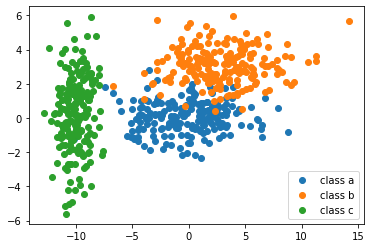

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.scatter(a[:,0],a[:,1],label='class a')
plt.scatter(b[:,0],b[:,1],label='class b')
plt.scatter(c[:,0],c[:,1],label='class c')
plt.legend()
plt.show()

### 1.1 Bayes method (5 pts)
Using the Bayes method, give the analytical expression of the separation curves between those three classes.
Do reasonable hypotheses about the distributions of those classes and estimate the corresponding parameters based on the given training sets.
Draw those curves on a plot, together with the training data.
For simplicity reasons, round the estimated parameters to the closest integer value.

In [4]:
# Add your implementation and discussion
import numpy as np

def covariance(array):
    return np.round(np.cov(array.T)).astype(int)
    
def mean(array):
    return np.round(np.mean(array,axis=0)).astype(int)

In [5]:
print('Mean of sample class a: \n{}\n'.format(mean(a)))
print('Mean of sample class b: \n{}\n'.format(mean(b)))
print('Mean of sample class c: \n{}\n'.format(mean(c)))

Mean of sample class a: 
[0 0]

Mean of sample class b: 
[3 3]

Mean of sample class c: 
[-10   0]



In [6]:
print('Covariance of sample class a: \n{}\n'.format(covariance(a)))
print('Covariance of sample class b: \n{}\n'.format(covariance(b)))
print('Covariance of sample class c: \n{}\n'.format(covariance(c)))

Covariance of sample class a: 
[[10  0]
 [ 0  1]]

Covariance of sample class b: 
[[10  0]
 [ 0  1]]

Covariance of sample class c: 
[[1 0]
 [0 5]]



In [7]:
from scipy.stats import shapiro
def hypothesis_checking(classi,classj,classx,covariancei,covariancej,covariancex): 
    ##test if data follow a normal distribution : 
    stati, pi = shapiro(classi)
    statj, pj = shapiro(classj)
    statx, px = shapiro(classx)
    print("for {} : Statistic = {} and p_value = {}".format("a",stati,pi))
    print("for {} : Statistic = {} and p_value = {}".format("b",statj,pj))
    print("for {} : Statistic = {} and p_value = {}".format("c",statx,px))
    alpha = 0.05
    if pi > alpha:
        print('{} looks Gaussian (fail to reject H0)'.format("a"))
    else:
        print('{} does not look Gaussian (reject H0)'.format("a"))
    
    if pj > alpha:
        print('{} looks Gaussian (fail to reject H0)'.format("b"))
    else:
        print('{} does not look Gaussian (reject H0)'.format("b"))
    
    if px > alpha:
        print('{} looks Gaussian (fail to reject H0)'.format("c"))
    else:
        print('{} does not look Gaussian (reject H0)'.format("c"))
        
     ##Determine if covariance matrices of each class are equal and if they are diagonal :
    if (np.array_equal(covariancei,covariancej)) and (np.array_equal(covariancei,covariancex)) and (np.array_equal(covariancej,covariancex)):
        if (np.count_nonzero(covariancei - np.diag(np.diagonal(covariancei))) == 0) : 
            print("Covariance matrices of each class are diagonal ")
        else :
            print("Covariance matrices of each class are equal")
    else : 
        print("None of the covariances matrices are equal")

hypothesis_checking(a,b,c,covariance(a),covariance(b),covariance(c))

for a : Statistic = 0.9620845913887024 and p_value = 1.1963419588312263e-08
for b : Statistic = 0.9585496783256531 and p_value = 3.4568339302154527e-09
for c : Statistic = 0.8562769889831543 and p_value = 1.0516706065598658e-18
a does not look Gaussian (reject H0)
b does not look Gaussian (reject H0)
c does not look Gaussian (reject H0)
None of the covariances matrices are equal


What we note from the samples are the following:
- The covariance matrices across classes are not identical.
- The covariance between the x and y coordinates for all classes is comparatively to its variances, small and if we round them up to closest integer then the covariance matrices are diagonal.

The general discriminant function, assuming normality distribution is:
\begin{equation}
    g_i(x) = \ln(p(x|w_i)) + \ln(P(w_i)) \\
    g_i(x) = -\frac{1}{2}x^T\Sigma_i^{-1}x+ \frac{1}{2}x^T\Sigma_i^{-1}\mu_i -\frac{1} {2}\mu_i^T\Sigma_i^{-1}\mu_i + \frac{1}{2}\mu_i^T\Sigma_i^{-1}x + \ln(P(w_i)) + c_i 
\end{equation}

By considering the constant value to be the same across classes and since our sample size is as well the same across classes, we can leave out the `ln(P(w_i)) + c_i`.
Now using the computed and integer rounded parameters of distribution for classes, the respective discriminant functions per classes are:

\begin{equation}
g_a(x) = -\frac{1}{2}(\frac{1}{10}x_1^2+x_2^2) \\
g_b(x) = -\frac{1}{2}(\frac{1}{10}x_1^2+x_2^2) + (\frac{3}{10}x_1 + 3x_2) - \frac{99}{20} \\ 
g_c(x) = -\frac{1}{2}(x_1^2+\frac{1}{5}x_2^2) - 10x_1 - 50
\end{equation}
Let's now find out about the two by two boundaries between classes.
The bounds between two classes are defined by the set of points $(x,y)\in\mathbb{R}^2$ s.t
- a|b:
    $$d_1(x) = (\frac{3}{10}x_1 + 3x_2) - \frac{99}{20} = 0$$
- a|c:
    $$d_2(x) = \frac{1}{2}(\frac{9}{10}x_1^2-\frac{1}{5}x_2^2)+10x_1+50=0 $$
- b|c:
    $$d_3(x) =  \frac{1}{2}(\frac{9}{10}x_1^2-\frac{1}{5}x_2^2)+\frac{103}{10}x_1+3x_2+\frac{901}{20}=0  $$

Let $h:I \times J \rightarrow \mathbb{R}$, with $I,J\subset \mathbb{R}^2$

\begin{equation}
h(x) = 
     \begin{cases}
       d_1(x) &\quad\text{when x |}\text{ d}_\text{2}(x)\ge0, \text{d}_\text{3}(x)\ge0\\
       d_2(x) &\quad\text{when x |}\text{ d}_\text{1}(x)\ge0\\
       d_3(x) &\quad\text{when x |}\text{ d}_\text{1}(x)\le0\\
     \end{cases}
\
\end{equation}
Parametric: 
\begin{equation}
    h(x) = 0
\end{equation}

In [8]:
# decision boundary
def d1(x,y):
    return 3/10*x + 3*y - 99/20
def d2(x,y):
    return 1/2*(9/10*x**2-1/5*y**2) + 10*x + 50
def d3(x,y):
    return 1/2*(9/10*x**2-1/5*y**2) + 103/10*x + 3*y + 901/20

# full boundary (used only for plot of combined level sets)
def h(x,y):
    # (x,y) meshes so x,y in I^2
    r,c = x.shape
    bools1 = d1(x,y) 
    bools2 = d2(x,y) 
    bools3 = d3(x,y) 
    
    ret = np.zeros_like(x)
    for i in range(r):
        for j in range(c):
            if bools1[i,j] >= 0:
                ret[i,j] = bools2[i,j]
            elif bools1[i,j] < 0:
                ret[i,j] = bools3[i,j]
            # tofinish
            
    return ret

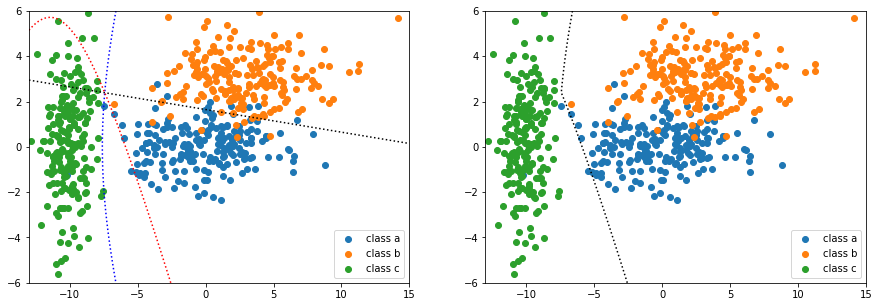

In [9]:
# https://stackoverflow.com/questions/14000595/graphing-an-equation-with-matplotlib
from math import ceil 
from math import floor 

xmin = floor(np.min([np.max(a[:,0]),np.min(b[:,0]),np.min(c[:,0])]))
xmax = ceil(np.max([np.max(a[:,0]),np.max(b[:,0]),np.max(c[:,0])]))
ymin = floor(np.min([np.min(a[:,1]),np.min(b[:,1]),np.min(c[:,1])]))
ymax = ceil(np.max([np.max(a[:,1]),np.max(b[:,1]),np.max(c[:,1])]))

resolution_mesh = 200
xlist = np.linspace(xmin, xmax, resolution_mesh) # Create 1-D arrays for x,y dimensions
ylist = np.linspace(ymin, ymax, resolution_mesh) 

X,Y = np.meshgrid(xlist, ylist) # Create 2-D grid xlist,ylist values
F = d1(X,Y)
G = d2(X,Y)
H = d3(X,Y)
FULL = h(X,Y)

fig,ax = plt.subplots(1,2,figsize=(15,5))

ax[0].contour(X, Y, F, [0], colors = 'k', linestyles = 'dotted')
ax[0].contour(X, Y, G, [0], colors = 'b', linestyles = 'dotted')
ax[0].contour(X, Y, H, [0], colors = 'r', linestyles = 'dotted')
ax[1].contour(X, Y, FULL, [0], colors = 'k', linestyles = 'dotted')

ax[0].scatter(a[:,0],a[:,1],label='class a')
ax[0].scatter(b[:,0],b[:,1],label='class b')
ax[0].scatter(c[:,0],c[:,1],label='class c')
ax[0].legend()

ax[1].scatter(a[:,0],a[:,1],label='class a')
ax[1].scatter(b[:,0],b[:,1],label='class b')
ax[1].scatter(c[:,0],c[:,1],label='class c')
ax[1].legend()

plt.show()


In [10]:
def classify_bayes(X):
    # (X) 1 datapoint 
    # a -> 0 | b -> 1 | c -> 2
    x,y = X
    f = d1(x,y)
    g = d2(x,y)
    h = d3(x,y)
    
    if f >= 0:
        if g >= 0:
            return 0
        else:
            return 2
    else:
        if h >= 0:
            return 1
        else:
            return 2
    

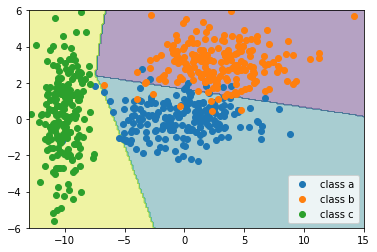

In [11]:
xmin = floor(np.min([np.max(a[:,0]),np.min(b[:,0]),np.min(c[:,0])]))
xmax = ceil(np.max([np.max(a[:,0]),np.max(b[:,0]),np.max(c[:,0])]))
ymin = floor(np.min([np.min(a[:,1]),np.min(b[:,1]),np.min(c[:,1])]))
ymax = ceil(np.max([np.max(a[:,1]),np.max(b[:,1]),np.max(c[:,1])]))

resolution_mesh = 200
xlist = np.linspace(xmin, xmax, resolution_mesh) # Create 1-D arrays for x,y dimensions
ylist = np.linspace(ymin, ymax, resolution_mesh) 

X,Y = np.meshgrid(xlist, ylist) # Create 2-D grid xlist,ylist values
class_ab = np.asarray([classify_bayes(np.array(x)) for x in np.c_[X.ravel(),Y.ravel()]])
class_ab = class_ab.reshape(X.shape)
plt.contourf(X,Y,class_ab,alpha = 0.4)

plt.scatter(a[:,0],a[:,1],label='class a')
plt.scatter(b[:,0],b[:,1],label='class b')
plt.scatter(c[:,0],c[:,1],label='class c')
plt.legend()
plt.show()

In [12]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# confusion matrix multi-class on full set


#### Discussion
##### Description of the processing : 

- In order to perform a Bayesian Classification, we assume that the class have a Gaussian distribution. We check later if this assumptions holds by doing an hypothesis test using the `shapiro` function from `scipy.stats` library. 

    <br/>
    
- Secondly, we calculated the mean and covariance matrix of each class. We round them to the nearest interger. We print the covariance matrices to check if they were equal and diagonal. 

    <br/>
    
- In function of the conclusion found for each class' covariance, we calculated the discriminant function by hand for each class. The results and calculations are shown previously.

    <br/>
    
- Finally, we plotted both class data and decisions line for each class. In addition, we also draw the class area were, if a new data point (with unknown class) was added, we could predict its class by simply looking to the area where it is.

    <br/>

##### General comment on method :

- The method gives very good classification results when the Gaussian's distribution assumption is respected. In addition of being quite simple to compute it mathematically, the method separate well each class and results in decision lines that take into account most of the intra and inter class variability.

    <br/>

- However, this Gaussian's distribution assumption is one of the main drawback of this method. If it is not respected, the decision line gives poor results and may lead to misclassfications. its assumption of independant predictor features is also one of its drawback because most of the predictor features collected won't respect it.

    <br/>

- Finally, The method can only works if we know the prior probability of each class. Although we can be easily estimate it, we can only get good approximation if we have enough points in our data set. 

##### Comment on results : 

- The decisions lines obtained gave quite a good classification of the data and separate well enough each class. However, some issues must be assessed. 

    <br/>
 
    - first of all, between class a and b, some points are misclassified. We observe that 8 points belonging to `class a` are classified as belonging to `class b` according to the decision line. The same observation can be made for `class b`. This can be explained by the fact that both `class a` and `class b` points are close to each other. In other words, the inter class variance between both class is small. We don't have a clear separation between `class a` and `class b` resulting in a mixing between points of both class.
    
        <br/>
        
    - The previsous observations is not present for `class c` because its inter class variance is large enough. Plus, the decision line of class is not linear but polynomial (due to the fact that its covariance matrix is not equal to those of `class a` and `class b`. This polynomial decision line give a good classification between `class a` and `class c` with no classification error. Every points of `class c` are labelled as `class c` according to the decision line and vice versa.   
         
        <br/>
        
    - Nonetheless, we have classification error between `class c` and `class b`. Indeed, 3 points belong to `class c` would be label as belonging to `class b` according the decision line. This error disappear when we consider the reunion of each decision line (as shown in the Figure with the dark line and in the Figure with every area of each class).
             
        <br/>

    - Finally, according to the resuts from the `shapiro` function, each class doesn't follow a Gaussian distribution. This can be seen graphically as the data distribution of `class a,b and c` are more elliptic than circular.
    
##### Comparison to other methods / variants : 

- for `class a` and `class b`,  the Mahalanobis distance or the L2 norm distance for the distirbution line, gives the same clasification.

    <br/>

- The use of other methods (ex :CNN,...) might give better classification results although they might tend to overfit the data. 

### 1.2 Mahalanobis distance (5 pts)
For classes `a` and `b`, give the expression of the Mahalanobis distance used to classify a point in class `a` or `b`, and verify the obtained classification, in comparison with the "complete" Bayes classification, for a few points of the plane.

Once again, our assumption of normal distribution and in this case after rounding, the covariance matrix for both `a` and `b` are equal.

Mahalanobis Distance: 
\begin{equation}
    d = ((x-\mu_i)\Sigma^{-1}(x-\mu_i))^{1/2} \\ 
    d_a = \sqrt{10x_1^2+x_2^2} \\ 
    d_b = \sqrt{10(x_1-3)^2+(x_2-3)^2}
\end{equation}

In [13]:
# Add your implementation and discussion
def da(x):
    centered = x**2 
    return np.sqrt(10*centered[:,1]+centered[:,0])

def db(x):
    centered = (x-3)**2
    return np.sqrt(10*centered[:,1]+centered[:,0])

def classify_mahalanobis(x):
    return da(x) <= db(x) #True -> belongs to class a else class b

# checking classification by mahalanobis
print(np.sum(da(a) <= db(a))/len(a))
print(np.sum(db(b) <= da(b))/len(b))

0.955
0.95


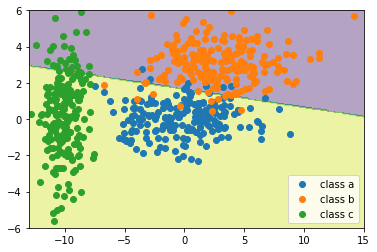

In [14]:
xmin = floor(np.min([np.max(a[:,0]),np.min(b[:,0]),np.min(c[:,0])]))
xmax = ceil(np.max([np.max(a[:,0]),np.max(b[:,0]),np.max(c[:,0])]))
ymin = floor(np.min([np.min(a[:,1]),np.min(b[:,1]),np.min(c[:,1])]))
ymax = ceil(np.max([np.max(a[:,1]),np.max(b[:,1]),np.max(c[:,1])]))

resolution_mesh = 200
xlist = np.linspace(xmin, xmax, resolution_mesh) # Create 1-D arrays for x,y dimensions
ylist = np.linspace(ymin, ymax, resolution_mesh) 

X,Y = np.meshgrid(xlist, ylist) # Create 2-D grid xlist,ylist values
class_ab = np.asarray([classify_mahalanobis(np.array([x])) for x in np.c_[X.ravel(),Y.ravel()]])
class_ab = class_ab.reshape(X.shape)
plt.contourf(X,Y,class_ab,alpha = 0.4)

plt.scatter(a[:,0],a[:,1],label='class a')
plt.scatter(b[:,0],b[:,1],label='class b')
plt.scatter(c[:,0],c[:,1],label='class c')
plt.legend()
plt.show()

In [15]:
# confusion matrix on full set

In [16]:
# comparison Complete vs Mahalanobis by confusion matrices
np.random.seed(10)

sample_size = 100
sample_a = a[np.random.choice(len(a), sample_size)]
sample_b = b[np.random.choice(len(b), sample_size)]

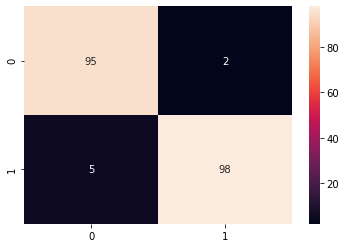

In [17]:
y_pred = np.concatenate((classify_mahalanobis(sample_a),
                         classify_mahalanobis(sample_b))).astype(int)
y_ground = np.asarray(len(sample_a) * [1] + len(sample_b) * [0])

# plt.figure(figsize=(15,15))
sns.heatmap(confusion_matrix(y_pred,y_ground),annot=True)
plt.show()

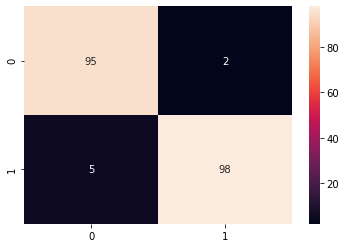

In [18]:
resa = np.array([classify_bayes(a_s) for a_s in sample_a])
resb = np.array([classify_bayes(b_s) for b_s in sample_b])
y_pred = np.concatenate((resa,resb)).astype(int)
y_ground = np.asarray(len(sample_a) * [1] + len(sample_b) * [0])

# plt.figure(figsize=(15,15))
sns.heatmap(confusion_matrix(y_pred,y_ground),annot=True)
plt.show()

#### Discussion : 

##### Description of the process : 

- the process deploy for this identical to the previous with the only exception that instead of using an L2 norm as a distance measurement, we use a Mahlanobis distance. This distance takes into account the covariance matrix in its calculation.

    <br\>

- In addition to plotting the decision line between `class a`and `class b`, we also plot confusion matrices. They represent the proportion of good or bad classification made by our model on a new data set (created by taking random elements inside our original data set). 

    <br\>

##### General comment on method : 

- The Mahalanobis distance measure distances based on the covariance among variables that are comapred. By using group means and covariances of each variables in the measurement, it suppress problems linked with scale and correlation of the data.[1]

    <br\>

- THe main disadvantegs of this new distance is its exacerbation of the role of small variables, corrupting the conclusion that can be drawn from the classficiation. 

##### Comment on results : 

- The decision line obtained from Mahalanobis distance is similar to the one obtained with Bayesian classfier

    <br\>

- Concerning the Confusion Matrices, our models seems to well classified the data when a new data set is present. We have 95 percent fo true negatives and 98 percent of true positive, compared with the true feature of the data.

##### Citation : 

[1] (2009) Mahalanobis Distance. In: Li S.Z., Jain A. (eds) Encyclopedia of Biometrics. Springer, Boston, MA. https://doi.org/10.1007/978-0-387-73003-5_865

---

## Part 2
In this part, we aim to classify digits using the complete version of MNIST digits dataset.
The dataset consists of 60'000 training images and 10'000 test images of handwritten digits.
Each image has size 28x28, and has assigned a label from zero to nine, denoting the digits value.
Given this data, your task is to construct a Multilayer Perceptron (MLP) for supervised training and classification and evaluate it on the test images.

Download the MNIST dataset (all 4 files) from http://yann.lecun.com/exdb/mnist/ under `lab-03-data/part2`.
You can then use the script provided below to extract and load training and testing images in Python. 

**! Warning**: When the lab was created the official MNIST repo was down, if it is still the case please use https://github.com/mkolod/MNIST.

### 2.1 Dataset loading
Here we first declare the methods `extract_data` and `extract_labels` so that we can reuse them later in the code.
Then we extract both the data and corresponding labels, and plot randomly some images and corresponding labels of the training set.

In [19]:
import gzip
import numpy as np
import matplotlib.pyplot as plt

def extract_data(filename, image_shape, image_number):
    with gzip.open(filename) as bytestream:
        bytestream.read(16)
        buf = bytestream.read(np.prod(image_shape) * image_number)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        data = data.reshape(image_number, image_shape[0], image_shape[1])
    return data


def extract_labels(filename, image_number):
    with gzip.open(filename) as bytestream:
        bytestream.read(8)
        buf = bytestream.read(1 * image_number)
        labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    return labels

In [20]:
!ls ../data/lab-03-data/part2/

t10k-images-idx3-ubyte.gz
t10k-labels-idx1-ubyte.gz
train-images-idx3-ubyte.gz
train-labels-idx1-ubyte.gz


In [21]:
image_shape = (28, 28)
train_set_size = 60000
test_set_size = 10000

data_part2_folder = os.path.join(data_base_path, data_folder, 'part2')

train_images_path = os.path.join(data_part2_folder, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_part2_folder, 'train-labels-idx1-ubyte.gz')
test_images_path = os.path.join(data_part2_folder, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_part2_folder, 't10k-labels-idx1-ubyte.gz')

train_images = extract_data(train_images_path, image_shape, train_set_size)
test_images = extract_data(test_images_path, image_shape, test_set_size)
train_labels = extract_labels(train_labels_path, train_set_size)
test_labels = extract_labels(test_labels_path, test_set_size)

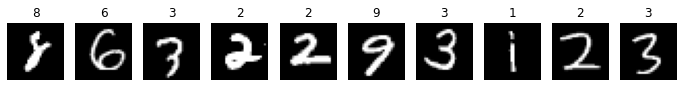

In [22]:
prng = np.random.RandomState(seed=123456789)  # seed to always re-draw the same distribution
plt_ind = prng.randint(low=0, high=train_set_size, size=10)

fig, axes = plt.subplots(1, 10, figsize=(12, 3))
for ax, im, lb in zip(axes, train_images[plt_ind], train_labels[plt_ind]):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(lb)

### 2.2 MLP (10 pts)

To create an MLP you are free to choose any library.
In case you don't have any preferences, we encourage you to use the [scikit-learn] package; it is a simple, efficient and free tool for data analysis and machine learning.
In this [link][sklearn-example], you can find a basic example to see how to create and train an MLP using [scikit-learn].
Your network should have the following properties:
* Input `x`: 784-dimensional (i.e. 784 visible units representing the flattened 28x28 pixel images).
* 100 hidden units `h`.
* 10 output units `y`, i.e. the labels, with a value close to one in the i-th class representing a high probability of the input representing the digit `i`.

If you need additional examples you can borrow some code from image classification tutorials.
However, we recommend that you construct a minimal version of the network on your own to gain better insights.

[scikit-learn]: http://scikit-learn.org/stable/index.html
[sklearn-example]: http://scikit-learn.org/stable/modules/neural_networks_supervised.html

In [23]:
# Add your implementation and discussion
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(100,), random_state=1)


clf.fit(train_images.reshape(train_images.shape[0],784), train_labels)

C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, random_state=1, solver='lbfgs')

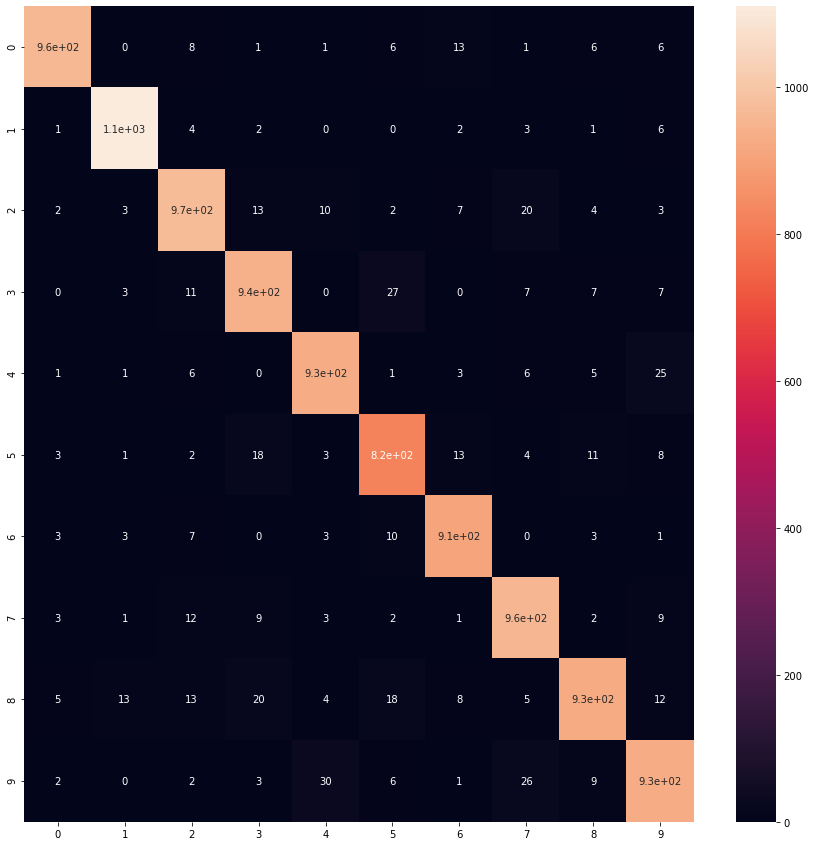

In [24]:
y_pred = clf.predict(test_images.reshape(test_images.shape[0],784))
plt.figure(figsize=(15,15))
sns.heatmap(confusion_matrix(y_pred,test_labels),annot=True)
plt.show()